# Analysis

1.The closer a city is to the equator the higher the temperature of the city is and viceversa.
2.The humidity in a city does not have a strong correlation with the temperature or latitude. Cities across the entire latitude range have similar humidity levels.
3.The highest wind speeds appeared farthest away from the equator, and those cities approximately 20 degrees North or South of the equator had the lowest humidity percentages.

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
import numpy as np
from citipy import citipy
from config_giorgia import api_key

# Generate Cities List

In [2]:
#creating a dataframe that contains all the longitude and latitude randomly generated
random_cities = pd.DataFrame()
random_cities['rand_latitude'] = [np.random.uniform(-90,90) for x in range(1500)]
random_cities['rand_longitude'] = [np.random.uniform(-180, 180) for x in range(1500)]
random_cities.head()

,rand_latitude,rand_longitude
0,-79.602936,111.947640
1,-87.501374,136.342141
2,11.722659,130.854640
3,-48.277598,120.710866
4,-32.837075,-149.205363


In [3]:
#adding to the data frame created the closest city and country related to the randomly generate coordinates
random_cities['Closest City'] = ""
random_cities['Country Code'] = ""

for index, row in random_cities.iterrows():
    lat = row['rand_latitude']
    lng = row['rand_longitude']
    random_cities.set_value(index, 'Closest City', citipy.nearest_city(lat, lng).city_name)
    random_cities.set_value(index, 'Country Code', citipy.nearest_city(lat, lng).country_code)

random_cities.head()

,rand_latitude,rand_longitude,Closest City,Country Code
0,-79.602936,111.947640,albany,au
1,-87.501374,136.342141,hobart,au
2,11.722659,130.854640,sulangan,ph
3,-48.277598,120.710866,albany,au
4,-32.837075,-149.205363,mataura,pf


In [4]:
#deleting duplicate cities in order to get the final unique city count
random_cities = random_cities.drop_duplicates(['Closest City', 'Country Code'])
random_cities = random_cities.dropna()
random_cities.reset_index(inplace=True)
print(len(random_cities['Closest City'].value_counts()))

606


In [5]:
#creating a new dataframe in order to keep only the city name and the country
cities = random_cities[['Closest City', 'Country Code']]

#rename columnds for later merging
cities = cities.rename(columns = {'Closest City': 'City'})
cities.head()
len(cities)

608

In [6]:
#adding the following columns to the dataframe that I will download via the openweathermap API
cities['Latitude'] = ""
cities['Longitude'] = ""
cities['Temperature (F)'] = ""
cities['Humidity (%)'] = ""
cities['Cloudiness (%)'] = ""
cities['Wind Speed (mph)'] = ""

cities.head()

,City,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,au,,,,,,
1,hobart,au,,,,,,
2,sulangan,ph,,,,,,
3,mataura,pf,,,,,,
4,east london,za,,,,,,


# Perform API calls

In [8]:
#start accessing the data
print("Begin API Call to OpenWeather Database ")
print("---------------------------------")

#determining the base url to use
#base_url ='http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='

searchcount = 0

for index, row in cities.iterrows():
    # Building target url
    query_url = ('http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s' % (row['City'], 
                                                                                              row['Country Code'], api_key))
    #query_url = base_url + 'appid=' + api_key + '&q=' + (row['City']) + '&units=' + (row['Country Code']) + '.json?'
    #url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=imperial&appid=%s" % (row['City Name'], 
                                                                                              #row['Country Code'], api_key)
   
    # Printing to ensure loop is correct
    searchcount += 1
    print("Processing record " + str(searchcount) + ' for the city: ' + row['City'])
    print("     Record found for city: " + row['City'])
    #print("Now retrieving City #" + str(index) + ": " + row['City'] + ", " + row['Country Code'])
    #print(query_url)
    
    # Running request
    weather_data = req.get(query_url).json()
    
    try:
        # Appending latitude and longitude to correct location
        row['Latitude'] = weather_data['coord']['lat']
        row['Longitude'] = weather_data['coord']['lon']
    
        # Appending temperature to correct location
        row['Temperature (F)'] = weather_data['main']['temp']
    
        # Appending humidity to correct location
        row['Humidity (%)'] = weather_data['main']['humidity']
    
        # Appending cloudiness to correct location
        row['Cloudiness (%)'] = weather_data['clouds']['all']
    
        # Appending wind speed to correct location
        row['Wind Speed (mph)'] = weather_data['wind']['speed']
    except:
        print("Error with city data. Skipping")
        continue
    
print("---------------------------------")
print("Processing Complete")
print("---------------------------------")

#changing the strings of the following columns into floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities[column] = pd.to_numeric(cities[column], errors='coerce')
    
#dropping all the n/a values
cities.dropna(inplace=True)

cities.head()

Begin API Call to OpenWeather Database 
---------------------------------
Processing record 1 for the city: albany
     Record found for city: albany
Processing record 2 for the city: hobart
     Record found for city: hobart
Processing record 3 for the city: sulangan
     Record found for city: sulangan
Processing record 4 for the city: mataura
     Record found for city: mataura
Error with city data. Skipping
Processing record 5 for the city: east london
     Record found for city: east london
Processing record 6 for the city: aklavik
     Record found for city: aklavik
Processing record 7 for the city: nome
     Record found for city: nome
Processing record 8 for the city: thompson
     Record found for city: thompson
Processing record 9 for the city: ushuaia
     Record found for city: ushuaia
Processing record 10 for the city: barrow
     Record found for city: barrow
Processing record 11 for the city: port lincoln
     Record found for city: port lincoln
Processing record 12 for 

Processing record 97 for the city: yanam
     Record found for city: yanam
Processing record 98 for the city: mazamari
     Record found for city: mazamari
Processing record 99 for the city: cap malheureux
     Record found for city: cap malheureux
Processing record 100 for the city: kodiak
     Record found for city: kodiak
Processing record 101 for the city: victoria
     Record found for city: victoria
Processing record 102 for the city: fortuna
     Record found for city: fortuna
Processing record 103 for the city: salalah
     Record found for city: salalah
Processing record 104 for the city: liverpool
     Record found for city: liverpool
Processing record 105 for the city: asyut
     Record found for city: asyut
Processing record 106 for the city: tuktoyaktuk
     Record found for city: tuktoyaktuk
Processing record 107 for the city: narsaq
     Record found for city: narsaq
Processing record 108 for the city: banmo
     Record found for city: banmo
Error with city data. Skippin

Processing record 192 for the city: gros islet
     Record found for city: gros islet
Processing record 193 for the city: pauini
     Record found for city: pauini
Processing record 194 for the city: meyungs
     Record found for city: meyungs
Error with city data. Skipping
Processing record 195 for the city: hithadhoo
     Record found for city: hithadhoo
Processing record 196 for the city: kemijarvi
     Record found for city: kemijarvi
Error with city data. Skipping
Processing record 197 for the city: ciras
     Record found for city: ciras
Error with city data. Skipping
Processing record 198 for the city: iquique
     Record found for city: iquique
Processing record 199 for the city: gangotri
     Record found for city: gangotri
Error with city data. Skipping
Processing record 200 for the city: comodoro rivadavia
     Record found for city: comodoro rivadavia
Processing record 201 for the city: castro
     Record found for city: castro
Processing record 202 for the city: korla
    

Processing record 287 for the city: san jose
     Record found for city: san jose
Processing record 288 for the city: storslett
     Record found for city: storslett
Processing record 289 for the city: kuala terengganu
     Record found for city: kuala terengganu
Processing record 290 for the city: cherskiy
     Record found for city: cherskiy
Processing record 291 for the city: bilma
     Record found for city: bilma
Processing record 292 for the city: malartic
     Record found for city: malartic
Processing record 293 for the city: saint-pierre
     Record found for city: saint-pierre
Processing record 294 for the city: eldikan
     Record found for city: eldikan
Error with city data. Skipping
Processing record 295 for the city: sur
     Record found for city: sur
Processing record 296 for the city: dzhusaly
     Record found for city: dzhusaly
Error with city data. Skipping
Processing record 297 for the city: marawi
     Record found for city: marawi
Processing record 298 for the ci

Processing record 382 for the city: nesna
     Record found for city: nesna
Processing record 383 for the city: quebrangulo
     Record found for city: quebrangulo
Processing record 384 for the city: athabasca
     Record found for city: athabasca
Processing record 385 for the city: neepawa
     Record found for city: neepawa
Processing record 386 for the city: san pedro de ycuamandiyu
     Record found for city: san pedro de ycuamandiyu
Processing record 387 for the city: leland
     Record found for city: leland
Processing record 388 for the city: karla
     Record found for city: karla
Processing record 389 for the city: holoby
     Record found for city: holoby
Processing record 390 for the city: pisco
     Record found for city: pisco
Processing record 391 for the city: bakchar
     Record found for city: bakchar
Processing record 392 for the city: upington
     Record found for city: upington
Processing record 393 for the city: sidi ali
     Record found for city: sidi ali
Proces

Processing record 478 for the city: shawville
     Record found for city: shawville
Processing record 479 for the city: tsiroanomandidy
     Record found for city: tsiroanomandidy
Processing record 480 for the city: uryupinsk
     Record found for city: uryupinsk
Processing record 481 for the city: muscat
     Record found for city: muscat
Processing record 482 for the city: el coyote
     Record found for city: el coyote
Processing record 483 for the city: birin
     Record found for city: birin
Error with city data. Skipping
Processing record 484 for the city: rocha
     Record found for city: rocha
Processing record 485 for the city: krasnyy chikoy
     Record found for city: krasnyy chikoy
Processing record 486 for the city: lompoc
     Record found for city: lompoc
Processing record 487 for the city: berkeley heights
     Record found for city: berkeley heights
Processing record 488 for the city: leshukonskoye
     Record found for city: leshukonskoye
Processing record 489 for the

Processing record 573 for the city: mouzakion
     Record found for city: mouzakion
Error with city data. Skipping
Processing record 574 for the city: matay
     Record found for city: matay
Processing record 575 for the city: skovde
     Record found for city: skovde
Error with city data. Skipping
Processing record 576 for the city: huilong
     Record found for city: huilong
Processing record 577 for the city: sabang
     Record found for city: sabang
Processing record 578 for the city: patria
     Record found for city: patria
Processing record 579 for the city: los angeles
     Record found for city: los angeles
Processing record 580 for the city: cristalina
     Record found for city: cristalina
Processing record 581 for the city: pevek
     Record found for city: pevek
Processing record 582 for the city: salinas
     Record found for city: salinas
Processing record 583 for the city: nalvo
     Record found for city: nalvo
Processing record 584 for the city: kesennuma
     Record 

,City,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,albany,au,-35.02,117.88,65.56,69.0,24.0,8.08
1,hobart,au,-42.88,147.33,69.80,43.0,0.0,10.29
2,sulangan,ph,11.14,123.72,83.56,100.0,48.0,9.98
4,east london,za,-33.02,27.91,68.00,60.0,0.0,17.22
5,aklavik,ca,68.22,-135.01,28.40,50.0,20.0,11.41


In [9]:
#exporting the dataframe
cities.to_csv("Cities_Weather_Info.csv")

In [10]:
#check cities dataframe to ensure the count of rows is accurate
print(cities.dtypes)

City                 object
Country Code         object
Latitude            float64
Longitude            object
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object


# Latitude vs Temperature Plot

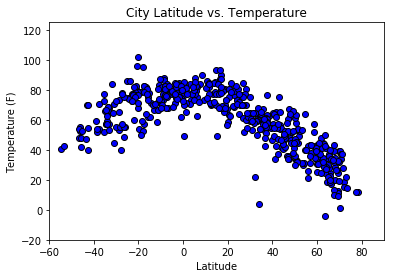

In [11]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Temperature (F)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Temperature (F)")
plt.ylim(-20,125)

#saving the plot
plt.savefig("Latitude_Vs_Temperature_Plot.png")
plt.show()

# Latitude vs Humidity Plot

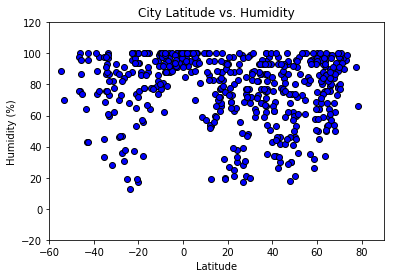

In [12]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Humidity (%)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Humidity (%)")
plt.ylim(-20,120)

#saving the plot
plt.savefig("Latitude_Vs_Humidity_Plot.png")
plt.show()

# Latitude vs. Cloudiness Plot

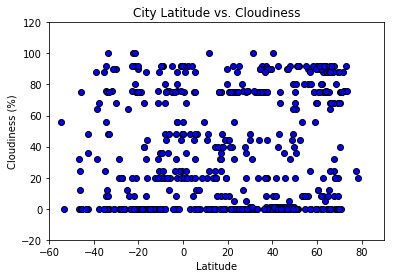

In [13]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Cloudiness (%)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,120)

#saving the plot
plt.savefig("Latitude_Vs_Cloudiness_Plot.png")
plt.show()

# Latitude vs. Wind Speed Plot

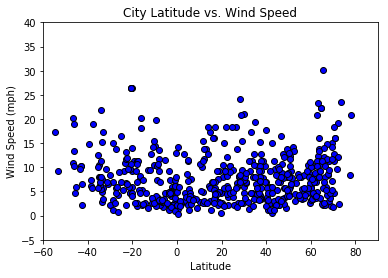

In [14]:
#determine axes values
x_axis = cities['Latitude']
y_axis = cities['Wind Speed (mph)']

#create the scatter plot
plt.scatter(x_axis, y_axis, c='blue', edgecolors='black', alpha=1)

#adding legend to the plot
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,90)
plt.ylabel("Wind Speed (mph)")
plt.ylim(-5,40)

#saving the plot
plt.savefig("Latitude_Vs_WindSpeed_Plot.png")
plt.show()